# Python Primer

Python is a dynamic, scripting language ideal for high-level programming. We'll be using a several powerful packages for a few common scientific computing routines and simulating quantum circuits.

But first, here's a guide to gettings things setup. If any step fails, chances are you can find a solution online, so do a little investigating.

Here are some [shortcuts](https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330) for jupyter notebook, if you want to save time. 

In [1]:
s = 10
print(s)
print(s + 5)
print(s * 2)
print(s ** 2)

10
15
20
100


In [2]:
s = 'Hello World'
print(s)

Hello World


If you're interested, there's quite a lot of cool stuff you can do with a very concise syntax in python.

In [3]:
print(3 * s[:6])
print(s[3:10:2]) # slicing - more on that later

Hello Hello Hello 
l ol


### Collections

Python collections primarily come in four flavors: `list`s, `tuple`s, `set`s, and `dict`s.

- `list` - mutable, indexable, iterable, ordered collection
- `tuple` - immutable, indexable, iterable, ordered collection
- `set` - mutable, unordered collection
- `dict` - mutable, unordered mapping

For any general questions, checkout the python documentation (`https://docs.python.org/3.6/tutorial/datastructures.html`), which is very well-written. For more specific questions, there's tons of help online (eg. Stack Overflow), or ask me.

In [4]:
l = [1, 'ordered', 10.2, [5, 3]]
print(l, l[0])
t = (4, 'tuple is also ordered', -0.5, (2, 'nested'))
print(t, t[-1][0])
s = {100, 'unordered', 6.5}
print(s, 'unordered' in s)
d = {1.2:'value', 5:10, 'key':'value', 10:'map'}
print(d, d['key'])

[1, 'ordered', 10.2, [5, 3]] 1
(4, 'tuple is also ordered', -0.5, (2, 'nested')) 2
{'unordered', 100, 6.5} True
{1.2: 'value', 5: 10, 'key': 'value', 10: 'map'} value


### Control Flow

All of the usual programming language keywords like `if`, `for`, and `while` are right at you're fingertips. You can also define you're own functions using the `def` keyword.

In [5]:
xs = []
x = 0.6 # initial condition
r = 3.9 # parameter - try values between 3 and 4
while len(xs) < 100: # Logistic map - chaos in one dimension - more info on wikipedia
    x = x*(1-x)
    x *= r # inplace multiplication
    xs.append(x)

In [6]:
x_max, x_min = None, None # None is similar to null
for x in xs:
    if x_max is None or x > x_max:
        x_max = x
    elif x_min is None or x < x_min:
        x_min = x
max_ms = 'worked' if max(xs) == x_max else 'failed' # inline conditional
min_ms = 'worked' if min(xs) == x_min else 'failed'
print('Max computation {} - max is about {:.3f}'.format(max_ms, x_max))
print('Min computation {} - min is about {:.3f}'.format(min_ms, x_min))

Max computation worked - max is about 0.975
Min computation worked - min is about 0.095


### Interpreted language

Python is not compiled, which means each line of code is read, interpreted, and executed without knowing anything about the rest of the script.

In [7]:
def login(password, key=hash('password')): # python allows you to provide default values for arguments, see keyword arguments for more info
    if hash(password) != key:
        print('Divide by zero imminent ... ', end='')
        return 100 / 0
    print('Passed')
    return 42

In [8]:
try:
    login('hacker skills')
except ZeroDivisionError as e:
    print('That caused the following error:')
    raise e # after some error handling, throw the error anyway so the user knows there's a problem

Divide by zero imminent ... That caused the following error:


ZeroDivisionError: division by zero

Thankfully, python offers a convenient way to handle errors. Above you can see the full stacktrace and some helpful information about the error.

In [9]:
answer = None
hacker_intuition = {"it's probably something lazy", 'maybe with a tab character \t', 
                    'or something to do with quantum computing', 'Schrödinger\'s equation', 
                    'or his cat', 'no try something simple', 'asdf', 'qwerty', 'Password', 
                    'Password123', 'password'}
while answer is None:
    try:
        guess = hacker_intuition.pop()
        answer = login(guess)
    except ZeroDivisionError as e:
        print('<{}> failed'.format(guess))
print('So the answer to the Ultimate Question of the universe is: {}'.format(answer))
print('But what was the question?')

Divide by zero imminent ... <or his cat> failed
Divide by zero imminent ... <Password123> failed
Divide by zero imminent ... <qwerty> failed
Divide by zero imminent ... <no try something simple> failed
Divide by zero imminent ... <maybe with a tab character 	> failed
Divide by zero imminent ... <or something to do with quantum computing> failed
Divide by zero imminent ... <it's probably something lazy> failed
Passed
So the answer to the Ultimate Question of the universe is: 42
But what was the question?


In [10]:
print('This is maybe cheating but...')
login('anything', key=hash('anything'))
print('Works too')

This is maybe cheating but...
Passed
Works too


## Numerical Python - `numpy`

The convenience of python comes at a price - performance. As a result, using native python constructs such as `for` loops can be very inefficient. The (elegant and exceptionally powerful) solution is the package `numpy`.

In [11]:
import numpy as np

`numpy` provides many convenient functions for working with arrays, vectors, matrices, and arbitrary tensors.

In [12]:
x = np.array([1,2,3,4])
print(x)

[1 2 3 4]


In [13]:
print(x + 2)
print(x * 2)
print(x[1:-1]) # numpy arrays also allow slicing

[3 4 5 6]
[2 4 6 8]
[2 3]


Slicing is is a way to index multiple values from an object. The format for slices are `a:b:c` where `a` is the starting index, `b` is the ending index (exclusive), and `c` is the step. 
Any of these values can be left out, in which case the default starting index is `0`, the default end is the end of the array, and the default step is `1`.
Finally, negative index values choose elements in reverse order, such that `x[-1]` is the last element in the array.

In [14]:
print('Shape: {}'.format(x.shape))

Shape: (4,)


All arrays have a shape showing the size of each dimension in the multi dimensional array.
And this shape can also be changed using `reshape`.
Indexing multi dimensional arrays is fairly intuitive, including slicing (there's a lot more advanced indexing options available, see `https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html`).

In [15]:
x = x.reshape(1,4) # produces a row vector (which is default for 1-dim arrays)
y = x.reshape(4,1) # produces a column vector
print(x.shape, y.shape)
print(x)
print(y)
print(x[0,1], y[1,0])

(1, 4) (4, 1)
[[1 2 3 4]]
[[1]
 [2]
 [3]
 [4]]
2 2


Note, reshaping arrays does not copy them. However, applying operations does produce a new array.

In [16]:
x[0,0] = 10
print(x)
print(y)
x = x + 1
print(x)
print(y)

[[10  2  3  4]]
[[10]
 [ 2]
 [ 3]
 [ 4]]
[[11  3  4  5]]
[[10]
 [ 2]
 [ 3]
 [ 4]]


In [17]:
magic = x + y
print('Adding an array of shape {} and {} produces an array of shape {}'.format(x.shape, y.shape, magic.shape))

Adding an array of shape (1, 4) and (4, 1) produces an array of shape (4, 4)


### Array construction

There are several common ways to construct `numpy` arrays.

- `array` - input a list (can be nested) of ints or floats.
- `arange` - input an end and optionally a start and step, produces a sequence
- `ones` - input desired shape, produces an array filled with ones.
- `zeros` - input desired shape, produces an array filled with zeros.
- `random.rand` - input desired shape, produces an array filled with samples from a uniform [0,1] distribution.
- `random.randn` - input desired shape, produces an array filled with samples from a normal distribution.

In [18]:
npxs = np.array(xs) # xs should contain the logistic map from earilier
print(npxs.shape)
samples = np.random.randn(10000)
print(samples.shape)

(100,)
(10000,)


### Array operations

Many of the basic operations with arrays are supported using the familiar operators (eg. `+`, `-`, `*`, `/`, `%`), but `numpy` also provides a plethora of other operations such as `sum`, `mean`, `std`, `sqrt`, etc.

Generally, any operations performed on arrays using `numpy` functions are significantly faster than using native python `list`s and `for` loops. So it's definitely worth learning a little about broadcasting and vectorized operations (`https://docs.scipy.org/doc/numpy/user/basics.html`).

In [19]:
import time, math

test = np.linspace(0, 2*np.pi, num=1000000)
print('Applying sin to an array with len={}'.format(len(test)))

start = time.time()
for i in range(len(test)):
    test[i] = math.sin(test[i])
print('Native python took {:.4f} sec'.format(time.time() - start))

start = time.time()
test = np.sin(test)
print('numpy took {:.4f} sec'.format(time.time() - start))

Applying sin to an array with len=1000000
Native python took 0.3583 sec
numpy took 0.0115 sec


### Linear Algebra

While some common linear algebra functions are built into `numpy` directly, `numpy.linalg` provides a more comprehensive library.

In [20]:
M = np.eye(10) # Identity matrix
v = np.arange(10)
print('Matrix multiplication: {}'.format(M @ v))

Matrix multiplication: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [21]:
R = np.random.randn(6,6)
S,V,D = np.linalg.svd(R)
print('Singular values: {}'.format(V))

Singular values: [3.51181787 3.1658503  2.73932905 1.59930977 1.06129093 0.27178352]


In [22]:
M = np.arange(16).reshape(4,4) + np.eye(4)
vals, vecs = np.linalg.eig(M)
print('Determinant: {}'.format(np.linalg.det(M)))
print('Eigenvalues: {}'.format(vals))

Determinant: -49.000000000000014
Eigenvalues: [33.4642492 -1.4642492  1.         1.       ]


## Plotting with `matplotlib`

Plotting and working with images would not be the same without `matplotlib`, which is designed to work perfectly with `numpy`. The `%matplotlib notebook` command makes plots interactive.

In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt

There are lots of ways to plot your data, but usually, you want to create a figure first using `figure`. Then you can plot using the `plot` function.

<IPython.core.display.Javascript object>


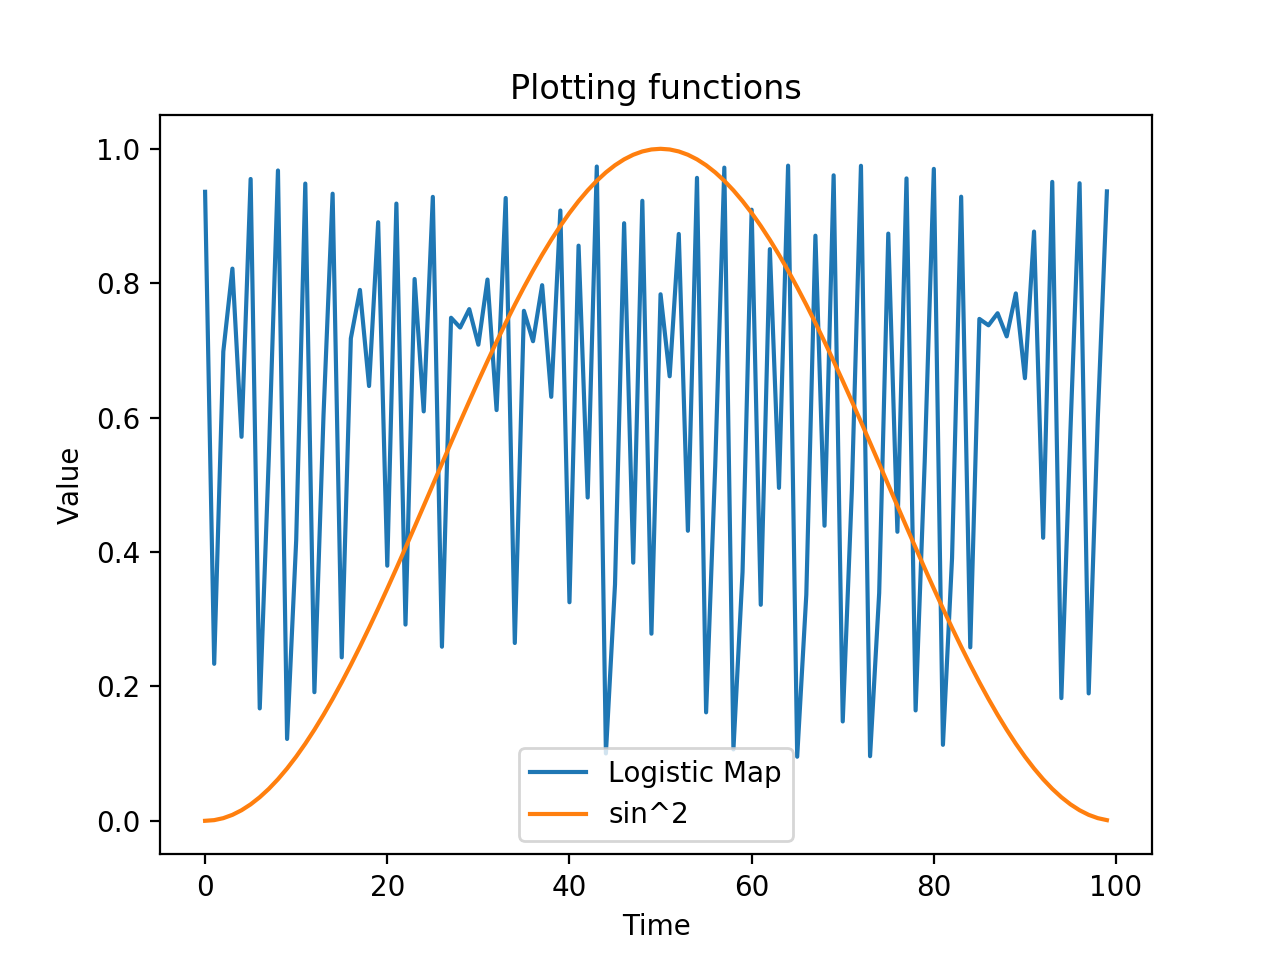

In [24]:
plt.figure()
X = np.arange(len(xs))
plt.plot(xs, label='Logistic Map')
plt.plot(X, np.sin(X*np.pi/len(X))**2, label='sin^2')
plt.title('Plotting functions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

You can also plot a histogram of your data using the `hist` function.

<IPython.core.display.Javascript object>


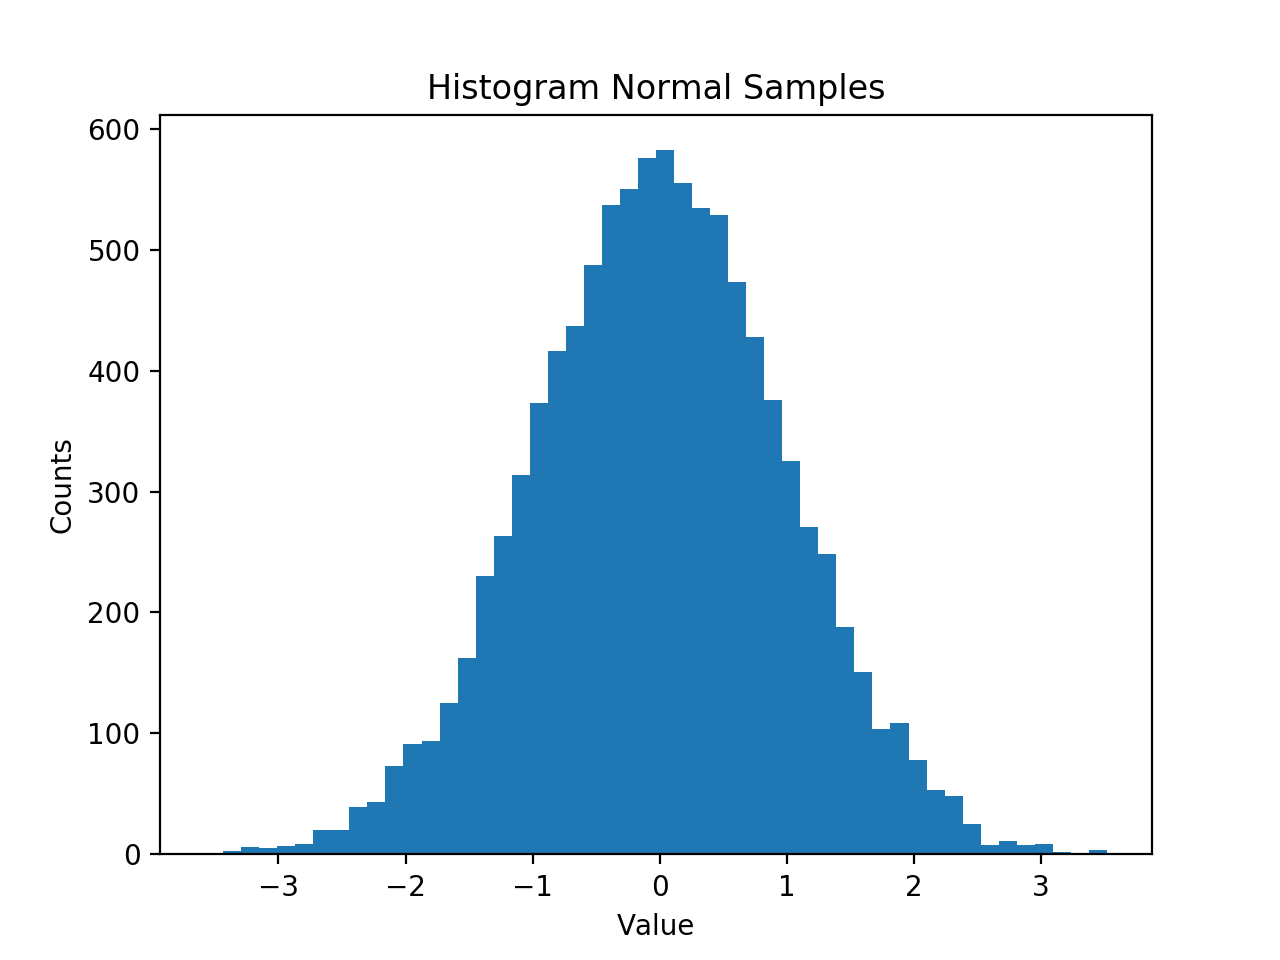

Text(0, 0.5, 'Counts')

In [25]:
plt.figure()
plt.hist(samples, bins=50)
plt.title('Histogram Normal Samples')
plt.xlabel('Value')
plt.ylabel('Counts')

Just as with `numpy` this only scrapes the surface of what `matplotlib` can do. Overall, `matplotlib` is an extensive package allowing you to visualize anything from animations to 3D plots while still being able to customize every little detail with a couple lines of python. I highly encourage you look at a few examples `https://matplotlib.org/tutorials/index.html`.

## Interactive programming

This notebook allows you code interactively. That means you can execute parts of a script (individual cells) which changing others. As you execute cells all the results update the overall state of the notebook.

In [28]:
try:
    foo # foo doesn't exist yet
except NameError as e:
    print('You haven\'t defined \'foo\' yet. Try executing the cell below')
else:
    print('Well done')

Well done


In [27]:
foo = 'something'
print('Now re-execute the cell above')

Now re-execute the cell above


In [30]:
try:
    will_this_work = 10
    if_i_do_this = 1
    print(will_this_work / if_i_do_this)
except:
    print('Something\'s wrong, can you fix the code in this cell to avoid this error')
else:
    print('Well Done')

10.0
Well Done


You can also use the output of a cell execution. The `_` character holds the output of the last executed cell. But the output of any cell can also be indexed with `Out`, given the index.

In [31]:
100 / 3

33.333333333333336

In [32]:
_ * 3

100.0

Look at the index of the output above, for example, if it says `Out[31]: 100.0`, the output can be accessed using `Out[31]`

In [33]:
Out[31]

33.333333333333336

You can access the documentation using `?` at then end of a function or class.

In [34]:
print?

In [35]:
np.random.randn?

In [36]:
plt.plot?

Another cool feature of jupyter notebooks is that you can use a bunch of special characters in your variables (eg. greek letters, underscores, exponents...).

All these special characters begin with `\` followed by the identifier of the character (similar to $\LaTeX$), for example $\alpha$ is `\alpha`. After typing the name, press `tab` to convert the special character identifier into the character.

In [ ]:
α

In [38]:
α, β, γ = 100, 2, 6
print(α + β ** γ)

164


Jupyter provides a fairly powerful auto completion system. So if you're having trouble remembering what an attribute was called you can simply press `tab` while typing, and jupyter will suggest completions.

In [39]:
Ψ, Θ = np.arange(3), np.ones(3)*10
Ω1 = np.stack([Ψ, Θ], 0)
print(Ω1)
try:
    Ω = np.concatenate([Ψ, Θ])
    print(Ω)
except AttributeError:
    print('Error: Try replacing \'np.con\' with the correct function call using auto-complete.')

[[ 0.  1.  2.]
 [10. 10. 10.]]
[ 0.  1.  2. 10. 10. 10.]


Aside from the interactive scripting, you can create cells that format text using markdown, and even format equations using $\LaTeX$.

If you are not familiar with $\LaTeX$ (LaTeX), then I suggest you look into it a little (one especially convenient way to work with $\LaTeX$ is Overleaf, `https://www.overleaf.com/`). 

For example, we'll be dealing with Schrödinger's equation soon, here's the time independent version in all its glory:

$$ \hat{\mathbf{H}} \psi(\mathbf{r}) = E \psi(\mathbf{r}) $$

where $ \hat{\mathbf{H}} = -\frac{\hbar^2}{2m}\nabla^2 + V(\mathbf{r}) $ is the hamiltonian.

There's a lot of other powerful things you can do with jupyter and python. I highly encouage you look more into all of these tools!

## Homework 


### Problem 1
Write a controlled NOT gate (aka CNOT or CX), which is a very important binary gate. The CNOT gate takes a control bit and a target bit as input, and inverts the target bit if and only if the control bit is 1.  
Note the control and target will have the same length.  

(a) Only one bit input. Example: control = 1, target = 0, output = 1

In [44]:
def CNOT(c, t):
    return c ^ t

In [45]:
import numpy as np
c = 1
t = 0
out = CNOT(c, t)
out

1

(b) Any length input Example: control = 111011001110, target = 000000000000, output = 111011001110

In [46]:
def CNOT(c, t):
    return c ^ t

In [47]:
import numpy as np
c = np.array([1,1,1,0,1,1,0,0,1,1,1,0])
t = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
out = CNOT(c, t)
out

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

### Brain teaser
If I have two coins with head as "0" and tail as "1". Each time fliping both coins, I want them to have the same result (either "00" or "11"). What should I do? 